# Performing Image Clustering Using KMeans

Author: Jordan A. Caraballo-Vega
Version: 2024.03.12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

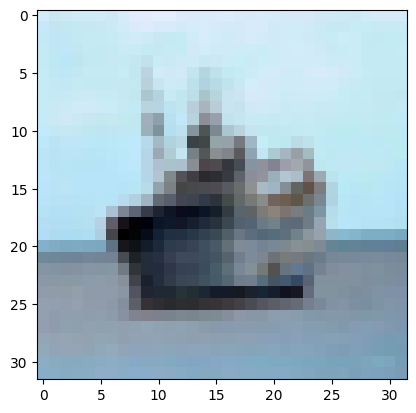

In [3]:
plt.imshow(x_train[567, :, :, :])

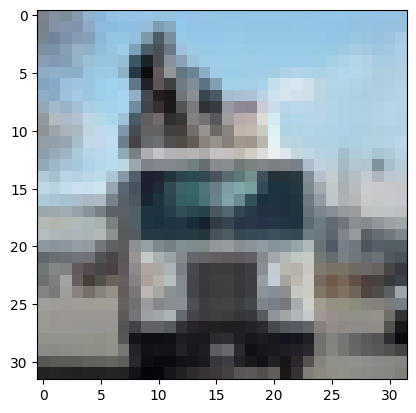

In [4]:
plt.imshow(x_train[1034, :, :, :])

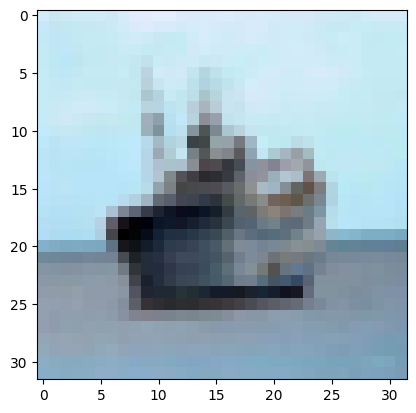

In [43]:
# ValueError: 'cubic' is not a valid value for interpolation; supported values are 'antialiased', 'none', 'nearest',
# 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom',
# 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.imshow(x_train[567, :, :, :], interpolation="nearest")

In [21]:
smaller_x_train = x_train[:5000, :, :, :]
smaller_x_train.shape

(5000, 32, 32, 3)

In [51]:
def rgb_to_grayscale(images):
    grayscale_images = np.zeros((images.shape[0], 32, 32))
    for i in range(images.shape[0]):
        grayscale_images[i] = np.dot(images[i], [0.299, 0.587, 0.114])
    return grayscale_images

x_train_grayscale = rgb_to_grayscale(smaller_x_train)
x_train_grayscale.shape

(5000, 32, 32)

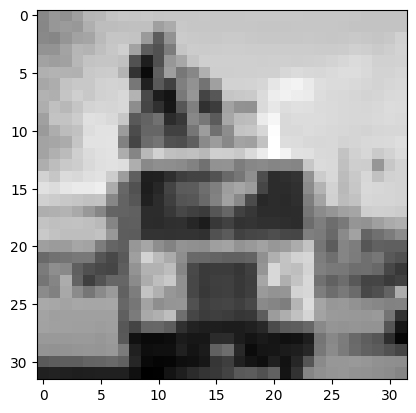

In [52]:
plt.imshow(x_train_grayscale[1034, :, :], cmap='gray')

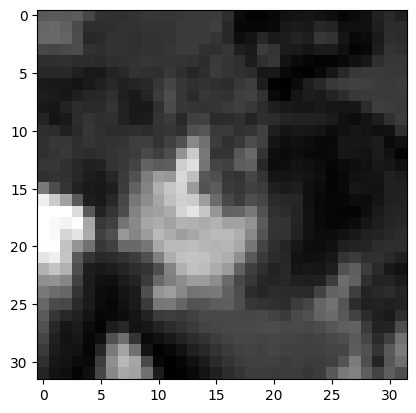

In [54]:
plt.imshow(x_train_grayscale[4302, :, :], cmap='gray')

In [55]:
x_train_grayscale = x_train_grayscale.reshape(x_train_grayscale.shape[0], -1)
x_train_grayscale.shape

(5000, 1024)

In [63]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_grayscale)
x_train_pca.shape

(5000, 152)

In [64]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(x_train_pca)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 1, ..., 1, 6, 5], dtype=int32)

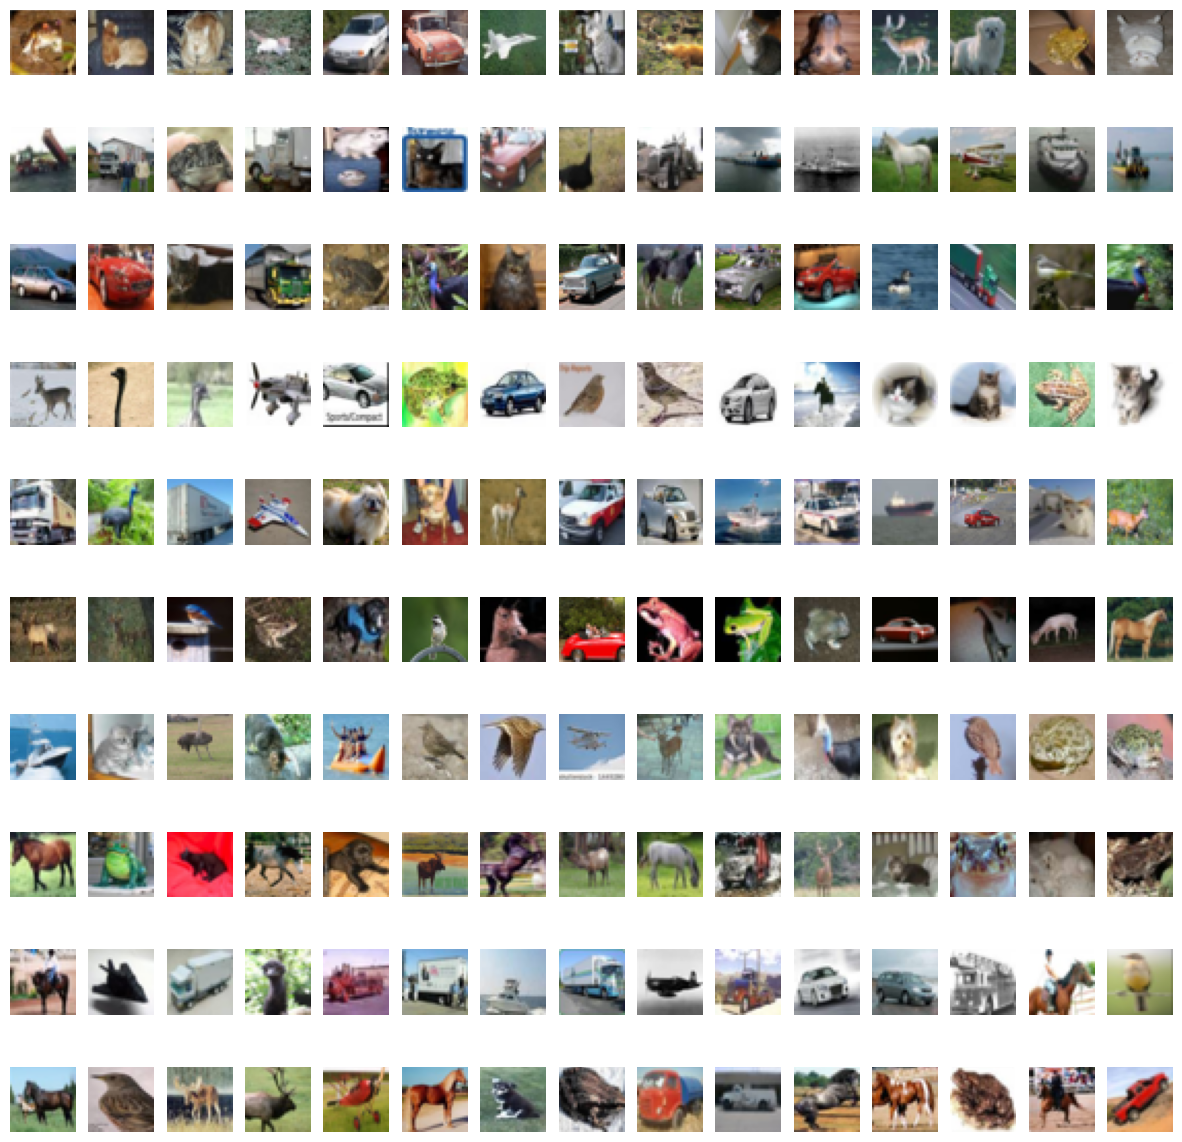

In [65]:
fig, axs = plt.subplots(10, 15, figsize=(15, 15))
for i in range(10):  # For each cluster
    cluster_indices = np.where(labels == i)[0]
    for j in range(15):  # Show 10 examples
        axs[i, j].imshow(smaller_x_train[cluster_indices[j]])
        axs[i, j].axis('off')
plt.show()